In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm
import numpy as np

In [2]:
# nyc_data_path = 'nyc_data_numeric.csv'
# grid_data_path = 'grid_data_updated.csv'
# geoinfo_path = 'NYC_GEOINFO2023.GEOINFO-Data.csv'

In [3]:
# nyc_data = pd.read_csv(nyc_data_path)
# grid_data = pd.read_csv(grid_data_path)
# geoinfo = pd.read_csv(geoinfo_path)

In [4]:
# geoinfo_cleaned = geoinfo.iloc[1:].copy()

In [5]:
# geoinfo_cleaned['INTPTLAT'] = pd.to_numeric(geoinfo_cleaned['INTPTLAT'], errors='coerce')
# geoinfo_cleaned['INTPTLON'] = pd.to_numeric(geoinfo_cleaned['INTPTLON'], errors='coerce')

In [53]:
# geoinfo_cleaned = geoinfo_cleaned.drop('Unnamed: 8', axis=1)

In [54]:
# def map_tract_to_grid(row, grid_df):
#     lat, lon = row['INTPTLAT'], row['INTPTLON']
#     match = grid_df[(grid_df['Min Lat'] <= lat) & (grid_df['Max Lat'] >= lat) &
#                     (grid_df['Min Long'] <= lon) & (grid_df['Max Long'] >= lon)]
#     if not match.empty:
#         return match.iloc[0]['Grid ID']
#     return None

In [55]:
# geoinfo_cleaned['Grid ID'] = geoinfo_cleaned.apply(lambda row: map_tract_to_grid(row, grid_data), axis=1)

In [56]:
# nyc_data['GEO_ID'] = nyc_data['Geography'].astype(str)
# merged_data = pd.merge(nyc_data, geoinfo_cleaned, on='GEO_ID', how='left')
# merged_data = pd.merge(merged_data, grid_data, on='Grid ID', how='left')

In [6]:
cleaned_data = pd.read_csv('nyc_grid_demographics.csv')

In [7]:
cleaned_data.head()

,NAMELSAD,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count,demographics_total_population,demographics_population_density,demographics_male_percent,demographics_percent_inhouseholds,...,demographics_percent_novehicles,demographics_percent_1vehicle_perperson,demographics_percent_lessthan1vehicle_perperson,demographics_under25y_percent_highschool,demographics_under25y_percent_somecollege,demographics_under25y_percent_bachelors,demographics_over25y_percent_highschool,demographics_over25y_percent_somecollege,demographics_over25y_percent_bachelors,demographics_over25y_percent_graduatedegree
0,0.0,60104.409463,32536.554849,0.023217,0.012538,809.935123,76.145174,711.637137,0.031884,0.061408,...,0.011956,0.001416,0.016414,0.028057,0.009163,0.004866,0.015039,0.008531,0.007772,0.008215
1,0.0,79995.754737,12649.840329,0.030901,0.004875,3038.773156,330.459432,3191.985274,0.117974,0.225244,...,0.045286,0.005247,0.062432,0.100633,0.041183,0.016746,0.056968,0.030053,0.029714,0.029208
2,0.0,89244.065018,3392.938834,0.034439,0.001313,19772.617405,1345.527712,18864.765244,0.138909,0.290828,...,0.063316,0.009432,0.127369,0.069519,0.023165,0.192250,0.017930,0.040644,0.091003,0.121762
3,0.0,92633.143638,0.000000,0.035904,0.000000,20742.064547,2085.425839,51257.291157,0.420895,0.886151,...,0.159645,0.031411,0.341106,0.118462,0.103425,0.582423,0.055746,0.076012,0.352063,0.362827
4,0.0,85376.275191,7260.663432,0.032947,0.002811,2555.760654,323.627033,4978.877431,0.032849,0.067889,...,0.016682,0.002234,0.030185,0.011777,0.000000,0.056298,0.002859,0.011709,0.018789,0.031859


In [8]:
features = cleaned_data.copy()

In [9]:
features.dtypes

NAMELSAD                                       float64
AREALAND                                       float64
AREAWATR                                       float64
AREALAND_SQMI                                  float64
AREAWATR_SQMI                                  float64
                                                ...   
demographics_under25y_percent_bachelors        float64
demographics_over25y_percent_highschool        float64
demographics_over25y_percent_somecollege       float64
demographics_over25y_percent_bachelors         float64
demographics_over25y_percent_graduatedegree    float64
Length: 95, dtype: object

In [10]:
features

,NAMELSAD,AREALAND,AREAWATR,AREALAND_SQMI,AREAWATR_SQMI,Ride Count,demographics_total_population,demographics_population_density,demographics_male_percent,demographics_percent_inhouseholds,...,demographics_percent_novehicles,demographics_percent_1vehicle_perperson,demographics_percent_lessthan1vehicle_perperson,demographics_under25y_percent_highschool,demographics_under25y_percent_somecollege,demographics_under25y_percent_bachelors,demographics_over25y_percent_highschool,demographics_over25y_percent_somecollege,demographics_over25y_percent_bachelors,demographics_over25y_percent_graduatedegree
0,0.0,60104.409463,32536.554849,0.023217,0.012538,809.935123,76.145174,711.637137,0.031884,0.061408,...,0.011956,0.001416,0.016414,0.028057,0.009163,0.004866,0.015039,0.008531,0.007772,0.008215
1,0.0,79995.754737,12649.840329,0.030901,0.004875,3038.773156,330.459432,3191.985274,0.117974,0.225244,...,0.045286,0.005247,0.062432,0.100633,0.041183,0.016746,0.056968,0.030053,0.029714,0.029208
2,0.0,89244.065018,3392.938834,0.034439,0.001313,19772.617405,1345.527712,18864.765244,0.138909,0.290828,...,0.063316,0.009432,0.127369,0.069519,0.023165,0.192250,0.017930,0.040644,0.091003,0.121762
3,0.0,92633.143638,0.000000,0.035904,0.000000,20742.064547,2085.425839,51257.291157,0.420895,0.886151,...,0.159645,0.031411,0.341106,0.118462,0.103425,0.582423,0.055746,0.076012,0.352063,0.362827
4,0.0,85376.275191,7260.663432,0.032947,0.002811,2555.760654,323.627033,4978.877431,0.032849,0.067889,...,0.016682,0.002234,0.030185,0.011777,0.000000,0.056298,0.002859,0.011709,0.018789,0.031859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.0,92357.255848,0.000000,0.035718,0.000000,4.777191,4348.531954,130143.383272,0.451416,0.949253,...,0.248525,0.008099,0.309856,0.181861,0.379098,0.035780,0.244089,0.244168,0.089245,0.021227
776,0.0,92359.250116,0.000000,0.035781,0.000000,0.823235,2757.698171,43487.847485,0.193487,0.343330,...,0.090033,0.006870,0.112034,0.069058,0.217857,0.054901,0.124704,0.108196,0.039548,0.028061
777,0.0,91625.954210,739.959426,0.035377,0.000280,0.542754,355.875310,2283.541423,0.032485,0.029606,...,0.009052,0.000562,0.010509,0.018166,0.048322,0.002561,0.024578,0.013284,0.003835,0.015061
778,0.0,92355.172634,0.000000,0.035815,0.000000,2.656497,4320.687619,117522.663147,0.412996,0.870088,...,0.215215,0.010614,0.272962,0.343343,0.362982,0.059897,0.303213,0.147286,0.129104,0.042206


In [11]:
features['AREALAND'] = features['AREALAND'].astype(np.float64)
features['AREAWATR'] = features['AREAWATR'].astype(np.float64)
features['AREALAND_SQMI'] = features['AREALAND_SQMI'].astype(np.float64)
features['AREAWATR_SQMI'] = features['AREAWATR_SQMI'].astype(np.float64)

In [32]:
# def calc_zscore_helper(ds, dropoutliers):
#     percrank = np.ceil(ds.rank(ascending=False)/(ds.count()) * 100)
#     zscore = (norm.ppf(1- percrank/100 + dropoutliers).round(4))

#     return zscore

In [33]:
# features = features.transform(lambda x: calc_zscore_helper(x, 0.005), axis=0)

In [12]:
features = features.dropna()
rideColumn = features['Ride Count']

In [13]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(features)

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns, index=features.index)

In [15]:
X_scaled_df['Ride Count'] = rideColumn

In [16]:
features = X_scaled_df.copy()

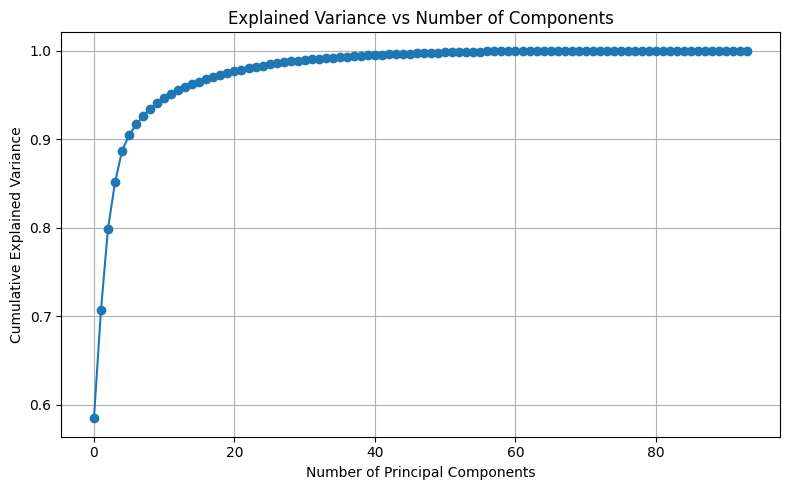


Number of components to explain 95% of variance: 12

Feature loadings on first few PCs:
                                                      PC1           PC2  \
NAMELSAD                                    -6.314170e-18  1.114157e-18   
AREALAND                                     1.107888e-01  5.722360e-02   
AREAWATR                                    -1.109058e-01 -5.767553e-02   
AREALAND_SQMI                                1.093704e-01  5.683426e-02   
AREAWATR_SQMI                               -1.108836e-01 -5.765156e-02   
...                                                   ...           ...   
demographics_under25y_percent_bachelors      6.755234e-02 -1.455789e-01   
demographics_over25y_percent_highschool      9.073988e-02  2.585713e-01   
demographics_over25y_percent_somecollege     9.994514e-02  1.666419e-01   
demographics_over25y_percent_bachelors       9.681579e-02 -1.709587e-01   
demographics_over25y_percent_graduatedegree  8.846270e-02 -2.247742e-01   

          

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === Load or assume df is already loaded ===
# Example placeholder:
# df = pd.read_csv('your_data.csv')

# === Separate features and target ===
X = features.drop('Ride Count', axis = 1)
y = features['Ride Count']
feature_names = X.columns

# === Run PCA with all components ===
pca = PCA()
X_pca = pca.fit_transform(X)

# === Plot cumulative explained variance ===
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print how many components explain 95% variance ===
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% of variance: {n_components_95}")

# # === Feature Loadings (for interpretability) ===
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)
print("\nFeature loadings on first few PCs:")
print(loadings.iloc[:, :5])  # Show loadings for first 5 PCs


# === Get absolute loadings ===
# Shape: [num_features, num_components]
loadings = np.abs(pca.components_.T)

# === Option 1: Use top N principal components (e.g. top 10 PCs) ===
top_n_pcs = 10
importance_scores = loadings[:, :top_n_pcs].sum(axis=1)  # Sum across top PCs

# === Option 2: Or weight by explained variance (better) ===
# explained_var = pca.explained_variance_ratio_[:top_n_pcs]
# importance_scores = (loadings[:, :top_n_pcs] * explained_var).sum(axis=1)

# === Get top 11 feature names ===
top_11_indices = np.argsort(importance_scores)[-12:][::-1]
top_11_features = feature_names[top_11_indices]

print("Top 11 features based on PCA:")
print(top_11_features.tolist())

In [17]:

features = features[['demographics_percent_income_10to15k', 'demographics_total_population', 'demographics_under25y_percent_somecollege', 'demographics_under25y_percent_highschool', 'demographics_under25y_percent_bachelors', 'demographics_percent_over85', 'demographics_percent_income_75to100k', 'demographics_percent_income_over200k', 'demographics_female_percent_80to84', 'demographics_male_percent_25to29', 'demographics_male_percent_under5', 'demographics_female_percent_25to29', 'Ride Count']]


In [18]:
features

,demographics_percent_income_10to15k,demographics_total_population,demographics_under25y_percent_somecollege,demographics_under25y_percent_highschool,demographics_under25y_percent_bachelors,demographics_percent_over85,demographics_percent_income_75to100k,demographics_percent_income_over200k,demographics_female_percent_80to84,demographics_male_percent_25to29,demographics_male_percent_under5,demographics_female_percent_25to29,Ride Count
0,0.018918,0.010343,0.011283,0.057078,0.004120,0.005361,0.032959,0.007372,0.015722,0.021261,0.036211,0.022657,809.935123
1,0.072236,0.044887,0.050714,0.204725,0.014180,0.024049,0.122402,0.025784,0.056445,0.079081,0.132406,0.083584,3038.773156
2,0.048263,0.182766,0.028526,0.141428,0.162797,0.103299,0.075559,0.134435,0.113242,0.075634,0.194641,0.094148,19772.617405
3,0.003728,0.283269,0.127363,0.240995,0.493194,0.079530,0.431726,0.636949,0.138621,0.304703,0.708880,0.340977,20742.064547
4,0.004169,0.043959,0.000000,0.023959,0.047673,0.015809,0.014068,0.035867,0.011744,0.016920,0.051695,0.019385,2555.760654
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.881202,0.590672,0.466839,0.369972,0.030299,0.157146,0.468240,0.006993,0.201446,0.363550,0.681389,0.320322,4.777191
776,0.278639,0.374585,0.268279,0.140489,0.046490,0.068655,0.163516,0.014035,0.118413,0.125897,0.259854,0.113404,0.823235
777,0.043308,0.048339,0.059505,0.036956,0.002168,0.018741,0.022648,0.000126,0.019373,0.012028,0.026265,0.010244,0.542754
778,0.667321,0.586890,0.446994,0.698485,0.050720,0.213504,0.716288,0.021147,0.262250,0.316582,0.643853,0.271898,2.656497


In [18]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
import joblib  # For saving the sklearn model

In [19]:
def prepare_data_sklearn(use_log=True, select_features=25):
    """
    Modified data preparation for scikit-learn models
    Returns numpy arrays instead of DataLoaders
    """
    df = features.copy()
    
    # Create log-transformed target if specified
    y = np.log1p(df['Ride Count'])
    X = features.drop(columns='Ride Count')
    
    
    # Feature selection
    if select_features > 0:
        selector = SelectKBest(f_regression, k=select_features)
        X = selector.fit_transform(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    return X_train, X_test, y_train, y_test, use_log

In [20]:
def train_linear_regression(X_train, X_test, y_train, y_test, use_log):
    """
    Train and evaluate scikit-learn Linear Regression model
    """
    # Create and train model
    lr_model = LinearRegression(fit_intercept=True)
    lr_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'train': {
            'r2': r2_score(y_train, y_pred_train),
            'mae': mean_absolute_error(y_train, y_pred_train),
            'mse': mean_squared_error(y_train, y_pred_train)
        },
        'test': {
            'r2': r2_score(y_test, y_pred_test),
            'mae': mean_absolute_error(y_test, y_pred_test),
            'mse': mean_squared_error(y_test, y_pred_test)
        }
    }
    
    # If using log-transform, calculate metrics in original scale
    if use_log:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_pred_train_orig = np.expm1(y_pred_train)
        y_pred_test_orig = np.expm1(y_pred_test)
        
        metrics['train_original_scale'] = {
            'mae': mean_absolute_error(y_train_orig, y_pred_train_orig),
            'mse': mean_squared_error(y_train_orig, y_pred_train_orig)
        }
        metrics['test_original_scale'] = {
            'mae': mean_absolute_error(y_test_orig, y_pred_test_orig),
            'mse': mean_squared_error(y_test_orig, y_pred_test_orig)
        }
    
    return lr_model, metrics

In [21]:
def visualize_metrics(metrics, use_log=True):
    """Visualize comparison between train and test metrics"""
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Log-scale metrics
    if use_log:
        ax[0].bar(['Train', 'Test'], [metrics['train']['mae'], metrics['test']['mae']], color=['blue', 'orange'])
        ax[0].set_title('MAE (log scale)')
        ax[1].bar(['Train', 'Test'], [metrics['train']['r2'], metrics['test']['r2']], color=['blue', 'orange'])
        ax[1].set_title('R² Score (log scale)')
    
    # Original-scale metrics
    if 'train_original_scale' in metrics:
        fig2, ax2 = plt.subplots(1, 2, figsize=(15, 6))
        ax2[0].bar(['Train', 'Test'], 
                  [metrics['train_original_scale']['mae'], 
                   metrics['test_original_scale']['mae']], 
                  color=['blue', 'orange'])
        ax2[0].set_title('MAE (original scale)')
        ax2[1].bar(['Train', 'Test'], 
                  [metrics['train_original_scale']['mse'], 
                   metrics['test_original_scale']['mse']], 
                  color=['blue', 'orange'])
        ax2[1].set_title('MSE (original scale)')
        
    plt.tight_layout()
    plt.show()
    plt.savefig('linear_regression_metrics_comparison.png')
    print("Metrics visualized and saved as linear_regression_metrics_comparison.png")


Log-scale Metrics:
Train R²: 0.6782, Test R²: 0.6067
Train MAE: 1.1859, Test MAE: 1.4051

Original-scale Metrics:
Train MAE: 28037.31, Test MAE: 44683.30
Train MSE: 11361192764.77, Test MSE: 40474066418.66

Model saved to linear_regression_model.pkl


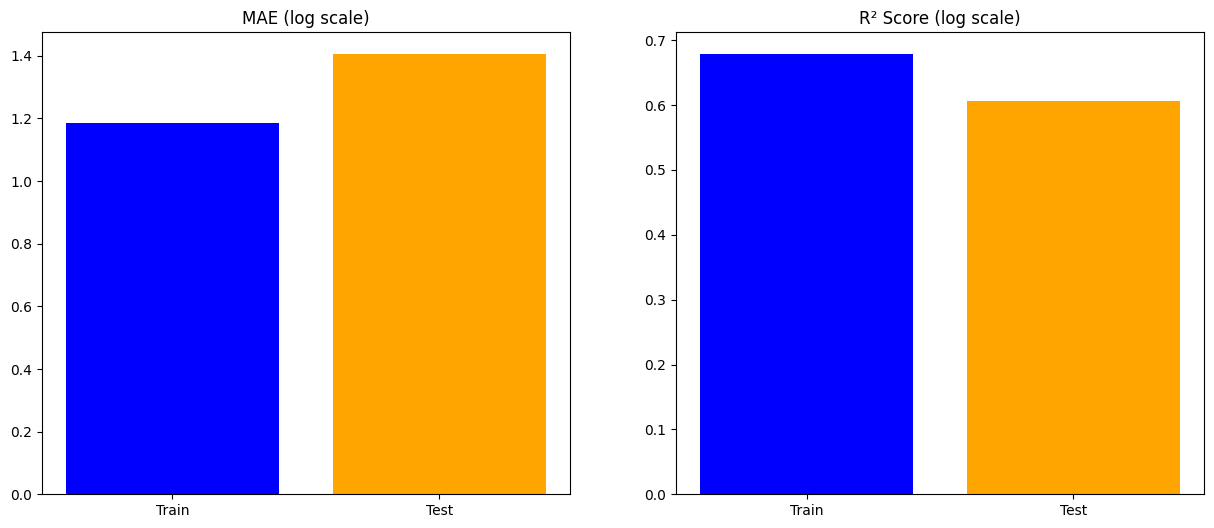

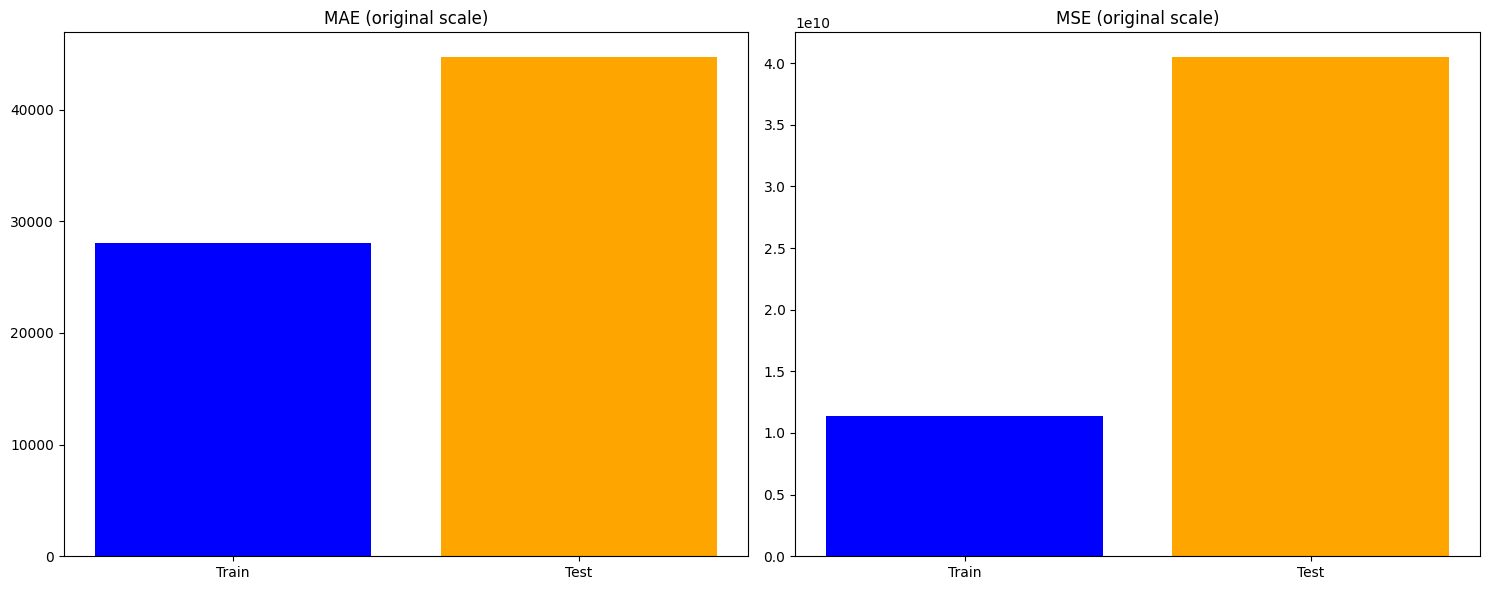

Metrics visualized and saved as linear_regression_metrics_comparison.png


<Figure size 640x480 with 0 Axes>

In [22]:
# Configuration
use_log = True
select_features = 94

# Prepare data
X_train, X_test, y_train, y_test, use_log = prepare_data_sklearn(
    use_log, select_features
)

# Train model
model, metrics = train_linear_regression(X_train, X_test, y_train, y_test, use_log)

# Print metrics
print("\nLog-scale Metrics:")
print(f"Train R²: {metrics['train']['r2']:.4f}, Test R²: {metrics['test']['r2']:.4f}")
print(f"Train MAE: {metrics['train']['mae']:.4f}, Test MAE: {metrics['test']['mae']:.4f}")

if use_log:
    print("\nOriginal-scale Metrics:")
    print(f"Train MAE: {metrics['train_original_scale']['mae']:.2f}, Test MAE: {metrics['test_original_scale']['mae']:.2f}")
    print(f"Train MSE: {metrics['train_original_scale']['mse']:.2f}, Test MSE: {metrics['test_original_scale']['mse']:.2f}")

# Save model
joblib.dump(model, 'linear_regression_model.pkl')
print("\nModel saved to linear_regression_model.pkl")

# Visualize metrics
visualize_metrics(metrics, use_log)

In [23]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate metrics
metrics = {
    'train': {
        'r2': r2_score(y_train, y_pred_train),
        'mae': mean_absolute_error(y_train, y_pred_train),
        'mse': mean_squared_error(y_train, y_pred_train)
    },
    'test': {
        'r2': r2_score(y_test, y_pred_test),
        'mae': mean_absolute_error(y_test, y_pred_test),
        'mse': mean_squared_error(y_test, y_pred_test)
    }
}

# If using log-transform, calculate metrics in original scale
if use_log:
    y_train_orig = np.expm1(y_train)
    y_test_orig = np.expm1(y_test)
    y_pred_train_orig = np.expm1(y_pred_train)
    y_pred_test_orig = np.expm1(y_pred_test)
    
    metrics['train_original_scale'] = {
        'mae': mean_absolute_error(y_train_orig, y_pred_train_orig),
        'mse': mean_squared_error(y_train_orig, y_pred_train_orig)
    }
    metrics['test_original_scale'] = {
        'mae': mean_absolute_error(y_test_orig, y_pred_test_orig),
        'mse': mean_squared_error(y_test_orig, y_pred_test_orig)
    }

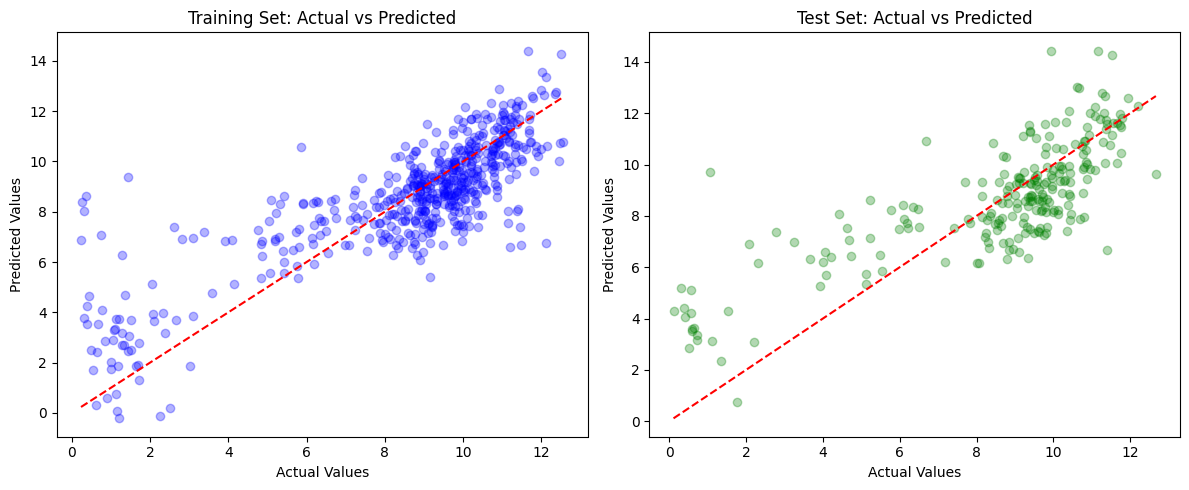

In [24]:
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.3, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.3, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

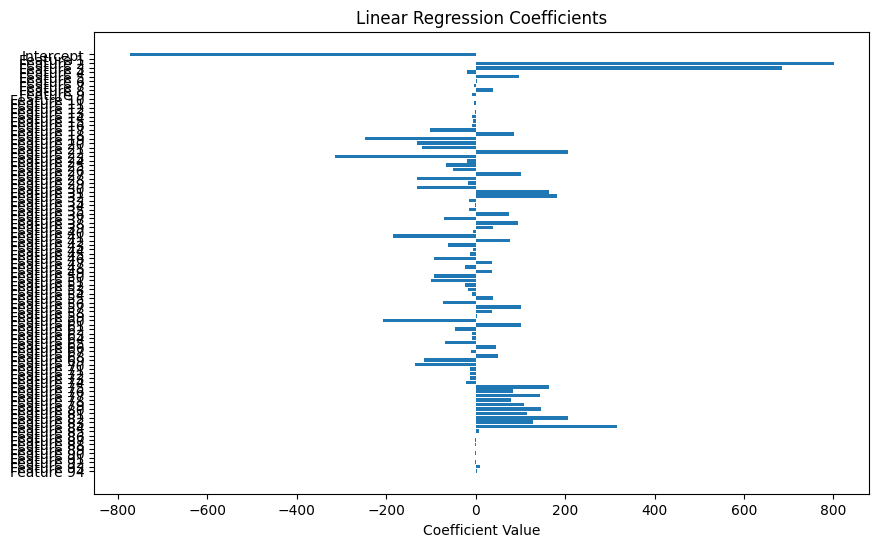

In [25]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# If no feature names provided, create generic labels
feature_names = [f'Feature {i+1}' for i in range(len(coefficients))]

# Combine intercept and coefficients
all_coeffs = np.insert(coefficients, 0, intercept)
all_labels = ['Intercept'] + feature_names

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(all_labels, all_coeffs)
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.gca().invert_yaxis()  # Show highest coefficients at top
plt.show()